In [1]:
from __future__ import division
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 8.0)
import cv2
import time

from mpl_toolkits.mplot3d import Axes3D
import fisheye
from skycameras import FisheyeProxy, Normalization
from CameraNetwork import Gimbal, GimbalCamera
from CameraNetwork import RGBsplit
import skycameras
import glob

In [2]:
p = Gimbal()
cam = GimbalCamera()

In [3]:
import itertools
imgs = []
imgsR = []
for i, (x, y) in enumerate(itertools.product(np.linspace(0, 90, 10), np.linspace(40, 140, 10))):
    p.move(int(x), int(y))
    time.sleep(1.5)
    img = cam.measure(exposure=100)
    imgs.append(img)
    imgsR.append(RGBsplit(img)[0].astype(np.uint8))
    plt.imsave('images/img_{}.jpg'.format(i), imgs[-1], cmap='gray', vmax=100)

In [9]:
fe = fisheye.FishEye(nx=10, ny=7, verbose=True)

rms, K, D, rvecs, tvecs = fe.calibrate(
    imgs=imgsR,
    show_imgs=False,
    calibration_flags=cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_FIX_SKEW
)


Processing img: 0...FAIL!
Processing img: 1...FAIL!
Processing img: 2...OK
Processing img: 3...OK
Processing img: 4...OK
Processing img: 5...OK
Processing img: 6...OK
Processing img: 7...OK
Processing img: 8...OK
Processing img: 9...FAIL!
Processing img: 10...FAIL!
Processing img: 11...OK
Processing img: 12...OK
Processing img: 13...OK
Processing img: 14...OK
Processing img: 15...OK
Processing img: 16...OK
Processing img: 17...OK
Processing img: 18...OK
Processing img: 19...OK
Processing img: 20...OK
Processing img: 21...OK
Processing img: 22...OK
Processing img: 23...OK
Processing img: 24...OK
Processing img: 25...OK
Processing img: 26...OK
Processing img: 27...OK
Processing img: 28...OK
Processing img: 29...OK
Processing img: 30...OK
Processing img: 31...OK
Processing img: 32...OK
Processing img: 33...OK
Processing img: 34...OK
Processing img: 35...OK
Processing img: 36...OK
Processing img: 37...OK
Processing img: 38...OK
Processing img: 39...OK
Processing img: 40...OK
Processing img

In [10]:
rms, K, D, rvecs, tvecs = fe.calibrate(
    imgs=imgsR,
    show_imgs=False,
    calibration_flags=cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_USE_INTRINSIC_GUESS
)

Processing img: 0...FAIL!
Processing img: 1...FAIL!
Processing img: 2...OK
Processing img: 3...OK
Processing img: 4...OK
Processing img: 5...OK
Processing img: 6...OK
Processing img: 7...OK
Processing img: 8...OK
Processing img: 9...FAIL!
Processing img: 10...FAIL!
Processing img: 11...OK
Processing img: 12...OK
Processing img: 13...OK
Processing img: 14...OK
Processing img: 15...OK
Processing img: 16...OK
Processing img: 17...OK
Processing img: 18...OK
Processing img: 19...OK
Processing img: 20...OK
Processing img: 21...OK
Processing img: 22...OK
Processing img: 23...OK
Processing img: 24...OK
Processing img: 25...OK
Processing img: 26...OK
Processing img: 27...OK
Processing img: 28...OK
Processing img: 29...OK
Processing img: 30...OK
Processing img: 31...OK
Processing img: 32...OK
Processing img: 33...OK
Processing img: 34...OK
Processing img: 35...OK
Processing img: 36...OK
Processing img: 37...OK
Processing img: 38...OK
Processing img: 39...OK
Processing img: 40...OK
Processing img

error: ..\..\..\opencv-3.1.0\modules\calib3d\src\fisheye.cpp:1375: error: (-215) svd.w.at<double>(0) / svd.w.at<double>((int)svd.w.total() - 1) < thresh_cond in function cv::internal::CalibrateExtrinsics


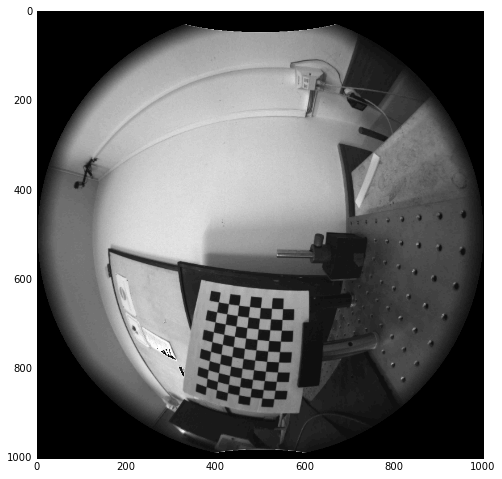

In [11]:
normalization = Normalization(1001, FisheyeProxy(fe))
img_normalized = normalization.normalize(imgsR[5])
plt.imshow(img_normalized*5, cmap='gray')

In [12]:
fe.save('fisheye.pkl')

In [13]:
fe.projectPoints

<bound method FishEye.projectPoints of <fisheye.core.FishEye object at 0x0000000016708390>>